In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the data

data = pd.read_csv("train.csv")
data.describe()
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Exploration

#### Survival vs Non-Survival 

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


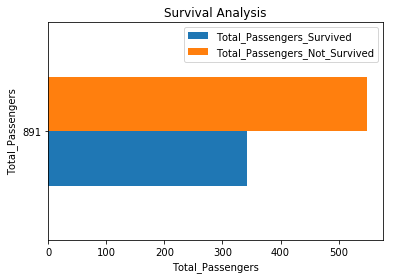

In [3]:
Total_Passengers = data.Survived.count()
Total_Passengers_Survived = data.Survived[(data.Survived==1)].count()
Total_Passengers_Not_Survived = data.Survived[(data.Survived==0)].count()

#Creating DataFrame
Passengers_data = {"Total_Passengers": [Total_Passengers],"Total_Passengers_Survived": [Total_Passengers_Survived],"Total_Passengers_Not_Survived": [Total_Passengers_Not_Survived ]}
Passengers_data = pd.DataFrame(Passengers_data, columns = ["Total_Passengers", "Total_Passengers_Survived","Total_Passengers_Not_Survived"])
Passengers_data

# Barh Graph Generation

Passengers_data.plot(x="Total_Passengers", y=["Total_Passengers_Survived","Total_Passengers_Not_Survived"],kind = "barh")
plt.xlabel("Total_Passengers")
plt.title("Survival Analysis")
plt.show()



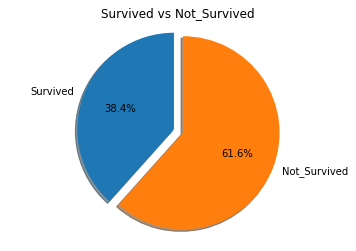

In [4]:
labels = "Survived","Not_Survived"
a = (Total_Passengers_Survived/Total_Passengers)*100
b= (Total_Passengers_Not_Survived/Total_Passengers)*100
sizes = [a, b]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. "Survived)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Survived vs Not_Survived")

plt.show()

  - Out of 891 passengers, 60% of passengers survived in the crash. 

#### Survival Analysis_Gender

In [5]:
# Survival Analysis by Gender (Survival -->0 = No, 1 = Yes)

#Count by Gender
femalecount = data.Sex[data.Sex=="female"].count()
malecount = data.Sex[data.Sex=="male"].count()

#Count by Gender and Survived
femalesurvived= data.Sex[(data.Sex =="female") & (data.Survived==1)].count()
malesurvived= data.Sex[(data.Sex =="male") & (data.Survived==1)].count()

#Creating DataFrame
Gender_data = {"Gender": ["Female", "Male"],"No_of_Passengers": [femalecount, malecount],"Total_Survived": [femalesurvived,malesurvived ]}
GenderByCategory = pd.DataFrame(Gender_data, columns = ["Gender", "No_of_Passengers","Total_Survived"])
GenderByCategory

,Gender,No_of_Passengers,Total_Survived
0,Female,314,233
1,Male,577,109


C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


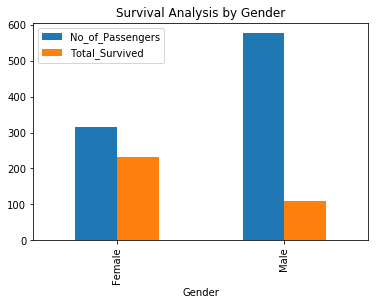

In [6]:
# Bar Graph Generation

GenderByCategory.plot(x="Gender", y=["No_of_Passengers","Total_Survived"],kind = "bar")
plt.xlabel('Gender')
plt.title('Survival Analysis by Gender')
plt.show()


In [7]:
# Survival percentage against Gender

malesuvival = round(((malesurvived/malecount)*100),2)
femalesuvival = round(((femalesurvived/femalecount)*100),2)

print("The percentage of male survived: ", malesuvival,"%")
print("The percentage of female survived: ", femalesuvival,"%")


The percentage of male survived:  18.89 %
The percentage of female survived:  74.2 %


 - Female survival rate is signficantly very high compared to Men.
 - There is a 72% chances of female getting survived in the crash.

#### Survival Analysis_Age Category

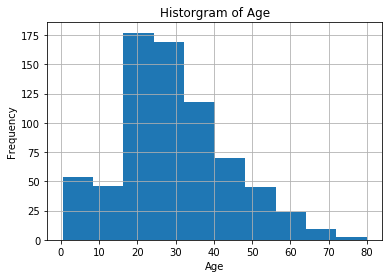

In [8]:
# Age frequency using histogram

data.Age.hist()
plt.title("Historgram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Survival Analysis by Age Category

#Age has been categorized to 5 categories and are : Children,Youth, Adult, Middle_Aged_Person and Senior_Citizen

# Total Passengers against Age_Category

Toddler = data.Age[data.Age<=3].count()
Children = data.Age[(data.Age>=4) & (data.Age<=15)].count()
Youth = data.Age[(data.Age<=25) & (data.Age>15)].count()
Adult = data.Age[(data.Age<=40) & (data.Age>25)].count()
Middle_Aged_Person = data.Age[(data.Age<=60) & (data.Age>40)].count()
Senior_Person = data.Age[(data.Age<=80) & (data.Age>40)].count()

# Survived against Age_Category

Toddler_survived = data.Age[(data.Age<=3) & (data.Survived == 1)].count()
Children_survived = data.Age[(data.Age>=4) & (data.Age<=15) & (data.Survived ==1)].count()
Youth_survived = data.Age[(data.Age<=25) & (data.Age>15) & (data.Survived ==1)].count()
Adult_survived = data.Age[(data.Age<=40) & (data.Age>25) &(data.Survived ==1)].count()
Middle_Aged_Person_survived = data.Age[(data.Age<=60) & (data.Age>40)& (data.Survived ==1)].count()
Senior_Person_survived = data.Age[(data.Age<=80) & (data.Age>40) & (data.Survived ==1)].count()

# Creating a dataframe
Age_data = {"Age_category": ["Toddler","Children", "Youth", "Adult", "Middle_Aged_Person", "Senior_Citizen"],"Total_Passengers": [Toddler,Children, Youth, Adult, Middle_Aged_Person, Senior_Person],"Total_Survived": [Toddler_survived, Children_survived, Youth_survived, Adult_survived, Middle_Aged_Person_survived, Senior_Person_survived]}
AgeByCategory = pd.DataFrame(Age_data, columns = ["Age_category", "Total_Passengers","Total_Survived"])
AgeByCategory

,Age_category,Total_Passengers,Total_Survived
0,Toddler,30,20
1,Children,53,29
2,Youth,218,75
3,Adult,263,111
4,Middle_Aged_Person,128,50
5,Senior_Citizen,150,55


C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


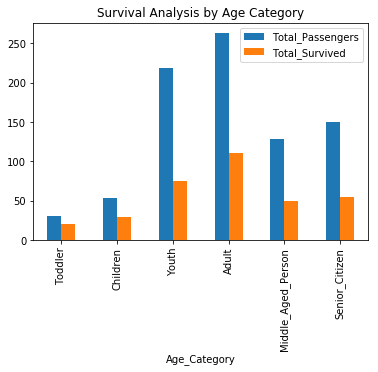

In [10]:
# Bar Graph Generation

AgeByCategory.plot(x="Age_category", y=["Total_Passengers","Total_Survived"],kind = "bar")
plt.xlabel("Age_Category")
plt.title("Survival Analysis by Age Category")
plt.show()

In [11]:
# Survival percentage against Age Category

toddlersurvival = round(((Toddler_survived/Toddler)*100),2)
childsuvival = round(((Children_survived/Children)*100),2)
youthsuvival = round(((Youth_survived/Youth)*100),2)
Adultsuvival = round(((Adult_survived/Adult)*100),2)
Middle_Aged_Personsuvival = round(((Middle_Aged_Person_survived/Middle_Aged_Person)*100),2)
Senior_Personsuvival = round(((Senior_Person_survived/Senior_Person)*100),2)

print("Percentage of Toddler's Survival: ", toddlersurvival,"%")
print("Percentage of Children Survival: ", childsuvival,"%")
print("Percentage of Youth Survival: ", youthsuvival,"%")
print("Percentage of Adult Survival: ", Adultsuvival,"%")
print("Percentage of Middle_Aged_Person Survival: ", Middle_Aged_Personsuvival,"%")
print("Percentage of Senior_Person Survival: ", Senior_Personsuvival,"%")

Percentage of Toddler's Survival:  66.67 %
Percentage of Children Survival:  54.72 %
Percentage of Youth Survival:  34.4 %
Percentage of Adult Survival:  42.21 %
Percentage of Middle_Aged_Person Survival:  39.06 %
Percentage of Senior_Person Survival:  36.67 %


- Age has been categorized to 5 categories and are : Children,Youth, Adult, Middle_Aged_Person and Senior_Citizen
    - Toddlers = Age between 1 to 3 
    - Children = Age between 4 than 15
    - Youth = Age between 16 and 25
    - Adult = Age between 26 and 40
    - Middle_Age_Person = Age between 40 and 60
    - Senior_Citizen = Age above 80 
- Survival Rate of Children is very high

#### Survival Analysis_Ticket Class

In [12]:
#Ticket class Analysis 

Pclass= data[data.Survived==1].groupby(["Pclass","Survived"])['Survived'].count()
Pclass_per= data[data.Survived==1].groupby(["Pclass","Survived"])['Survived'].count()/Total_Passengers_Survived*100
PclassByGender = data[data.Survived==1].groupby(["Sex", "Pclass","Survived"])['Survived'].count()/Total_Passengers_Survived*100

print(Pclass)
print(Pclass_per)
print(PclassByGender)

# There is no significant difference in survival chances with "Ticket Class"

Pclass  Survived
1       1           136
2       1            87
3       1           119
Name: Survived, dtype: int64
Pclass  Survived
1       1           39.766082
2       1           25.438596
3       1           34.795322
Name: Survived, dtype: float64
Sex     Pclass  Survived
female  1       1           26.608187
        2       1           20.467836
        3       1           21.052632
male    1       1           13.157895
        2       1            4.970760
        3       1           13.742690
Name: Survived, dtype: float64


- There was no significant differences seen under "Ticket_Class"

#### Survival Analysis_parents / children

In [13]:
# Survival chances if they are parent/children

No_Parch_Survived = data[(data.Survived==1) & (data.Parch==0)].groupby(["Survived","Parch"])["Survived"].count()/Total_Passengers_Survived*100
Parch_Survived = data[(data.Survived==1) & (data.Parch>=1)].groupby(["Survived","Parch"])["Survived"].count()
Parch_Survived_per = data[(data.Survived==1) & (data.Parch>=1)].groupby(["Survived","Parch"])["Survived"].count()/Total_Passengers_Survived*100

print(Parch_Survived)
print(Parch_Survived_per)
print(No_Parch_Survived)



Survived  Parch
1         1        65
          2        40
          3         3
          5         1
Name: Survived, dtype: int64
Survived  Parch
1         1        19.005848
          2        11.695906
          3         0.877193
          5         0.292398
Name: Survived, dtype: float64
Survived  Parch
1         0        68.128655
Name: Survived, dtype: float64


- 68% of passengers survived do not have children/parent onboard .
- one or more chidren/parent onboard does have significant in the survival rate.


#### Survival Analysis_Sibling/Spouse

In [14]:
# Survival chances if they have Sibling

No_SibSp_Survived = data[(data.Survived==1) & (data.SibSp==0)].groupby(["Survived","SibSp"])["Survived"].count()/Total_Passengers_Survived*100
SibSp_Survived = data[(data.Survived==1) & (data.SibSp>=1)].groupby(["Survived","SibSp"])["Survived"].count()
SibSp_Survived_per = data[(data.Survived==1) & (data.SibSp>=1)].groupby(["Survived","SibSp"])["Survived"].count()/Total_Passengers_Survived*100

print(SibSp_Survived)
print(SibSp_Survived_per)
print(No_SibSp_Survived)


Survived  SibSp
1         1        112
          2         13
          3          4
          4          3
Name: Survived, dtype: int64
Survived  SibSp
1         1        32.748538
          2         3.801170
          3         1.169591
          4         0.877193
Name: Survived, dtype: float64
Survived  SibSp
1         0        61.403509
Name: Survived, dtype: float64


- 60% of passengers survived do not have Siblings/Spouse onboard. 
- Survival chances of passengers with one sibling is relatively high compared to others having more than one siblings onboard.

#### Survival Analysis_Ticket Fare

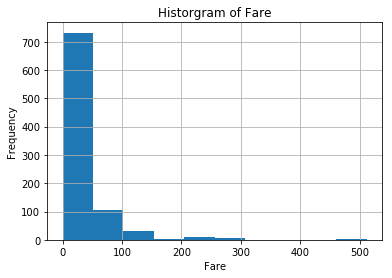

891
731
0.681286549708


In [15]:
# Fare frequency using histogram

data.Fare.hist()
plt.title("Historgram of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


print(data.Fare.count())
print(data.Fare[data.Fare<=50].count())
print(data.Fare[(data.Fare<=50)& (data.Survived==1)].count()/Total_Passengers_Survived)

- 700 passengers travelling had bought ticket for less than 51 dollars.
- Out of 39% of passengers survived, 68% of passenger's fare was less than 51 dollars.

# Data Cleansing and PreProcessing

In [16]:
# Hadling Missing Values in the column Age
data["Age"].fillna((data["Age"].mean()),inplace=True) 
data = data.dropna(axis=0) # remvoving records with no values 

# Removal of Columns
cols = ["PassengerId", "Name","Cabin","Ticket"] 
data_set = data.drop(cols,axis=1)

# Extraction of target and dependent variables
x = data_set.drop("Survived", axis =1)
y = data_set.Survived

# encode all the features those are not numerical 
# ( Note:  assuming all are the ordinal categories, ideally for nominal categories need to convert them in one-hot-coding )
# Assignment - Change all nominal to one-hot-coding and ordinal attributes into pandas encoding.
for feature in x.columns:
    if x[feature].dtype == 'object':
        x[feature] = pd.Categorical(x[feature]).codes 
        
# Splitting into train and test data 
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 0)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


- Data Imputation
- Removal of columns such as "PassengerId", "Name","Cabin","Ticket"
- Extraction of target and dependent variables
- One-Hot Encoding
    -Gender : female = 0 , male = 1
    -Embarked : C = 0 , Q = 1, S = 2
- data split 

# Machine Learning

#### Model Selection with default parameters

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

metrics.accuracy_score(y_test, y_pred)


0.70731707317073167

In [18]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
y_pred = tree_model.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.75609756097560976

In [19]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.73170731707317072

In [20]:
# SVM Classifier
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)

metrics.accuracy_score(y_test, y_pred)


0.65853658536585369

In [21]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.75609756097560976

- Used 5 classification models with default parameters and here are the accuracy scores below: 
    - Gradient Boosting : 71%
    - Logistic Regression : 71%
    - Decision Tree : 68%
    - Random Forest : 68%
    - SVM : 65%
    
- Gradient Boosting is yielding high accuracy level

#### Model Tuning - Grid Search

- Decision Tree Model 
    - 71% after tunning

In [22]:
# Decision Tree Model

from sklearn.model_selection import GridSearchCV

DecisionTreeClassifier()

param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [2, 3, 4 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [5, 10 ],
               "min_samples_leaf"  : [ 4, 5, 10]
                                }


optimized_tree = GridSearchCV(tree_model, param_grid, scoring='accuracy', cv=5 )
optimized_tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': [2, 3, 4], 'splitter': ['best', 'random'], 'min_samples_split': [5, 10], 'min_samples_leaf': [4, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
optimized_tree.best_score_

0.78260869565217395

In [24]:
optimized_tree.best_params_

{'criterion': 'entropy',
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'splitter': 'random'}

In [25]:
tree_final = DecisionTreeClassifier(criterion = 'gini', max_features = 3, min_samples_leaf = 10, min_samples_split = 10, 
                                          splitter = 'random')
model_f = tree_final.fit(x_train, y_train)

In [26]:
y_pred_tree = model_f.predict(x_test)
tree_result = metrics.accuracy_score(y_pred_tree, y_test) 
print(tree_result)

0.658536585366


- Gradient Boosting Model 
    - 73% after tunning

In [27]:
# Gradient Boosting Model
# Ref - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier



param_grid = { "n_estimators"      : [100],             
               "max_features"      : [3, 4, 5],     
               "min_samples_leaf"  : [10, 15],
               "learning_rate"     :[0.1, 0.2, 0.3]
                }

optimized_gb = GridSearchCV(gb_model, param_grid, scoring='accuracy', cv=5 )
optimized_gb.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'max_features': [3, 4, 5], 'min_samples_leaf': [10, 15], 'learning_rate': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [28]:
optimized_gb.best_score_


0.73291925465838514

In [29]:
optimized_gb.best_params_

{'learning_rate': 0.3,
 'max_features': 4,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [30]:
gb_model_final = GradientBoostingClassifier(learning_rate=0.1, max_features=4, n_estimators=100, min_samples_leaf=15 )
gb_model_final.fit(x_train, y_train)
y_pred_gb = gb_model_final.predict(x_test)
gb_result = metrics.accuracy_score(y_test, y_pred_gb)
print(gb_result)

0.756097560976


#### Gradient Boosting model provided better accuracy compared to the rest of the classification models
   
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn import metrics

    model_final = GradientBoostingClassifier(learning_rate=0.1, max_features=4, n_estimators=100, min_samples_leaf=15)
    model_final.fit(x_train, y_train)
    y_pred_gb = model_final.predict(x_test)
    gb_result = metrics.accuracy_score(y_test, y_pred_gb)
    print(gb_result)    
  